# <font color='blue'>Project - Term Deposit Sale</font>
*Prasad Menon*

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Import the Libraries

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

In [184]:
# 1. Univariate analysis (12 marks)
# a. Univariate analysis – data types and description of the independent attributes
# which should include (name, meaning, range of values observed, central values
# (mean and median), standard deviation and quartiles, analysis of the body of
# distributions / tails, missing values, outliers.
# b. Strategies to address the different data challenges such as data pollution, outlier’s
# treatment and missing values treatment.
# c. Please provide comments in jupyter notebook regarding the steps you take and
# insights drawn from the plots.

## Univariate Analysis

In [185]:
bank_data_original = pd.read_csv("bank-full.csv")
bank_data=bank_data_original.copy()


In [186]:
bank_data.head() # Looking at head, there are no issues

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [187]:
bank_data.tail()  # Looking at tail, there are no issues

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Checking for class inbalance

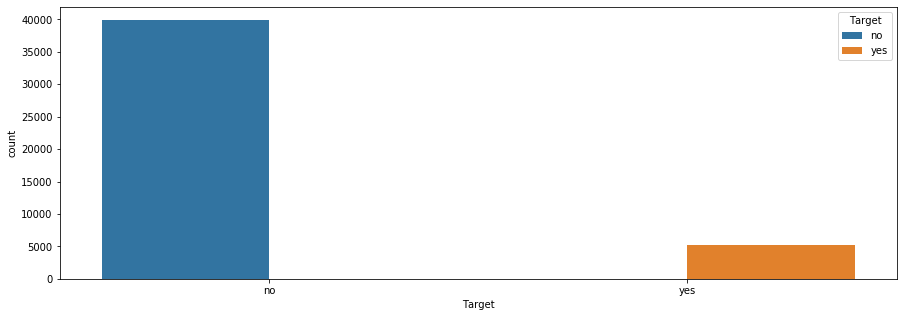

In [188]:
# Verifying the data for class imbalance
plt.figure(figsize=(15,5)) 
sns.countplot(x="Target", data=bank_data,hue="Target")
# Here we can see that class is imbalanced, only 11% of customers have subscribed for term deposit

In [189]:
bank_data.shape   #45211 rows and 17 columns

(45211, 17)

In [190]:
bank_data.isnull().values.any() # No null values

False

In [191]:
print(bank_data.isnull().sum().sum())   # 0 missing values

0


In [192]:
duplicateRowsDF = bank_data[bank_data.duplicated()]
print(duplicateRowsDF.head())          # There are 0 duplicate rows in this data set

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []


In [193]:
bank_data.dtypes
# Here we can see many columns are of type object

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [194]:
#  Categoricals are a pandas data type that corresponds to the categorical variables in statistics. Such variables take on a fixed and limited number of possible values. 
for data in bank_data.columns:
    if bank_data[data].dtype == 'object' :
        bank_data[data] = pd.Categorical(bank_data[data])

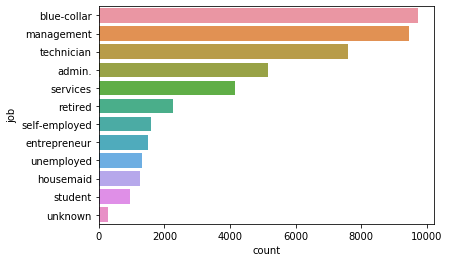

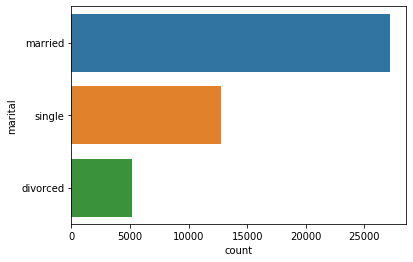

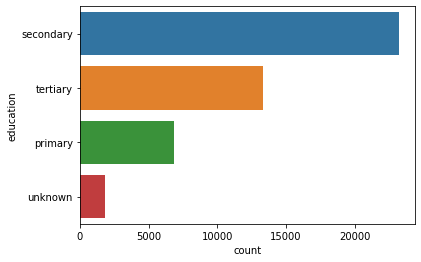

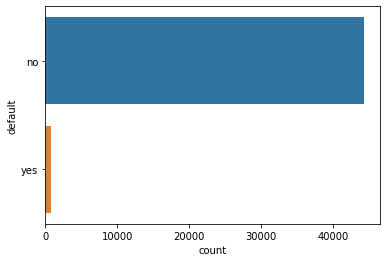

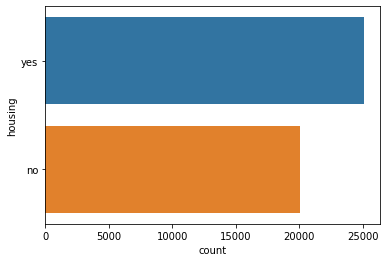

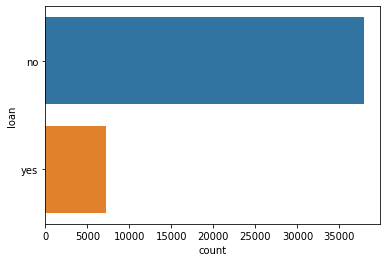

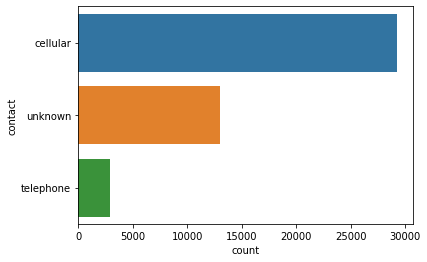

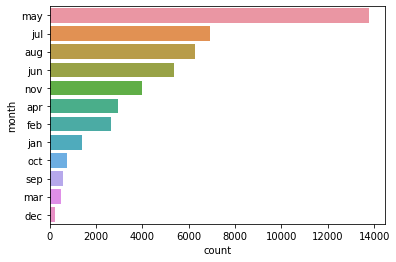

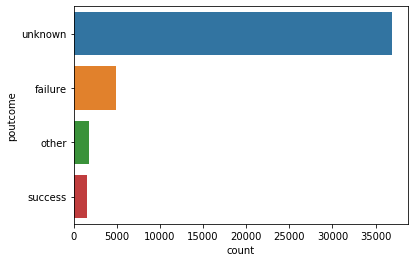

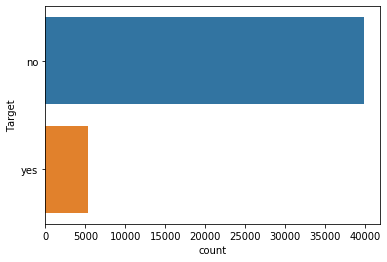

In [195]:
for feature in bank_data.dtypes[bank_data.dtypes == 'category'].index:
    sns.countplot(y=feature, data=bank_data, order = bank_data[feature].value_counts().index)
    plt.show()

In [196]:
bank_data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [197]:
print(bank_data.job.value_counts())        # no order, do one hot encoding
print(bank_data.marital.value_counts())    # no order, do one hot encoding
print(bank_data.education.value_counts())  # convert into int
print(bank_data.default.value_counts())    # convert into int
print(bank_data.housing.value_counts())    # convert into int
print(bank_data.loan.value_counts())       # convert into int
print(bank_data.contact.value_counts())    # no order, do one hot encoding
print(bank_data.month.value_counts())       # convert into int
print(bank_data.poutcome.value_counts())    # convert into int

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


## b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment

In [198]:
# Checking job column, 68% of the jobs belong to top 4 categories, a very small % is unknown, we can drop it.
bank_data.job.value_counts()/bank_data.job.count()
#Dropping the unknown job level
bank_data = bank_data[bank_data.job != 'unknown']

In [199]:
# Checking education column, 95% of the jobs belong to top 3 categories, a very small % is unknown, we can drop it.
bank_data.education.value_counts()/bank_data.education.count()
#Dropping the unknown education level
bank_data = bank_data[bank_data.education != 'unknown']

In [200]:
replaceStruct = {
                "education":   {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "default":     {"no": 0, "yes": 1 },
                "housing":     {"no": 0, "yes": 1 } ,
                "loan":        {"no": 0, "yes": 1 } ,
                "month":       {"jan": 1, "feb": 2 ,"mar" : 3, "apr" : 4, "may": 5,"jun" :6,"jul" : 7, "aug" : 8,"sep" : 9,"oct":10,"nov": 11, "dec": 12 }, 
                "poutcome":    {"other": 1, "success": 1 ,"failure": 2 ,"unknown":-1},
                 "Target":     {"no": 0, "yes": 1 },
                    }
oneHotCols=["job","marital","contact"]

In [201]:
bank_data=bank_data.replace(replaceStruct)
bank_data=pd.get_dummies(bank_data, columns=oneHotCols)
bank_data.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,1,0,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
5,35,3,0,231,1,0,5,5,139,1,...,0,0,0,0,0,1,0,0,0,1
6,28,3,0,447,1,1,5,5,217,1,...,0,0,0,0,0,0,1,0,0,1
7,42,3,1,2,1,0,5,5,380,1,...,0,0,0,0,1,0,0,0,0,1
8,58,1,0,121,1,0,5,5,50,1,...,0,0,0,0,0,1,0,0,0,1
9,43,2,0,593,1,0,5,5,55,1,...,0,1,0,0,0,0,1,0,0,1
10,41,2,0,270,1,0,5,5,222,1,...,0,0,0,0,1,0,0,0,0,1
11,29,2,0,390,1,0,5,5,137,1,...,0,0,0,0,0,0,1,0,0,1


In [202]:
bank_data.dtypes

age                   int64
education            object
default               int64
balance               int64
housing               int64
loan                  int64
day                   int64
month                 int64
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome              int64
Target                int64
job_admin.            uint8
job_blue-collar       uint8
job_entrepreneur      uint8
job_housemaid         uint8
job_management        uint8
job_retired           uint8
job_self-employed     uint8
job_services          uint8
job_student           uint8
job_technician        uint8
job_unemployed        uint8
job_unknown           uint8
marital_divorced      uint8
marital_married       uint8
marital_single        uint8
contact_cellular      uint8
contact_telephone     uint8
contact_unknown       uint8
dtype: object

In [203]:
# Number of unique in each column
bank_data.nunique()

age                    75
education               3
default                 2
balance              6995
housing                 2
loan                    2
day                    31
month                  12
duration             1558
campaign               47
pdays                 557
previous               41
poutcome                3
Target                  2
job_admin.              2
job_blue-collar         2
job_entrepreneur        2
job_housemaid           2
job_management          2
job_retired             2
job_self-employed       2
job_services            2
job_student             2
job_technician          2
job_unemployed          2
job_unknown             1
marital_divorced        2
marital_married         2
marital_single          2
contact_cellular        2
contact_telephone       2
contact_unknown         2
dtype: int64

In [204]:
bank_data.describe().transpose()
# balance, duration, campaign, pdays  is highly skewed

,count,mean,std,min,25%,50%,75%,max
age,43193.0,40.764082,10.512640,18.0,33.0,39.0,48.0,95.0
default,43193.0,0.018105,0.133332,0.0,0.0,0.0,0.0,1.0
balance,43193.0,1354.027342,3042.103625,-8019.0,71.0,442.0,1412.0,102127.0
housing,43193.0,0.562406,0.496096,0.0,0.0,1.0,1.0,1.0
loan,43193.0,0.164541,0.370770,0.0,0.0,0.0,0.0,1.0
day,43193.0,15.809414,8.305970,1.0,8.0,16.0,21.0,31.0
month,43193.0,6.151483,2.409781,1.0,5.0,6.0,8.0,12.0
duration,43193.0,258.323409,258.162006,0.0,103.0,180.0,318.0,4918.0
campaign,43193.0,2.758178,3.063987,1.0,1.0,2.0,3.0,58.0
pdays,43193.0,40.404070,100.420624,-1.0,-1.0,-1.0,-1.0,871.0


In [205]:
bank_data_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Text(0, 0.5, 'Number of Customers')

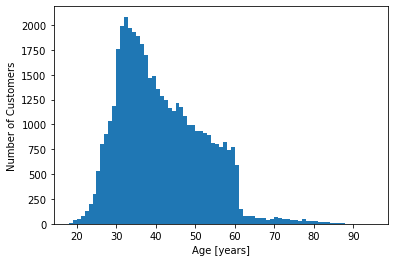

In [206]:
sns.distplot(bank_data_original['age'], kde=False, hist_kws={"alpha": 1}, bins=bank_data_original['age'].nunique()) 
# Most customers of bank are between 30-40 yrs of age
plt.xlabel('Age [years]')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

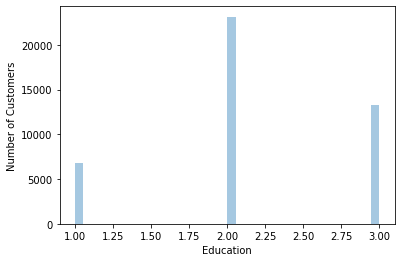

In [207]:
sns.distplot(bank_data['education'], kde=False) 
# Most customers of bank are having secondary education followed by tertiary
plt.xlabel('Education')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

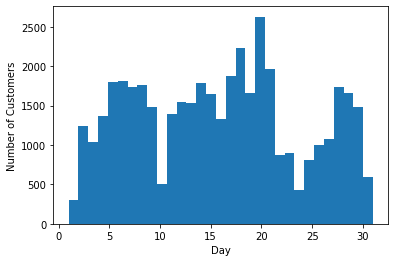

In [208]:
sns.distplot(bank_data['day'], kde=False , hist_kws={"alpha": 1}, bins=bank_data_original['day'].nunique()) 
# Most customers of bank were last contacted on 20th
plt.xlabel('Day')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

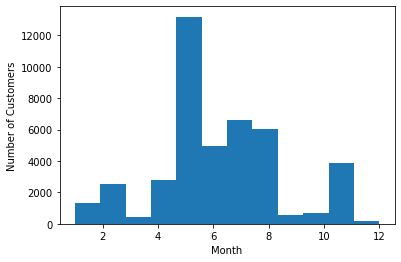

In [209]:
sns.distplot(bank_data['month'], kde=False , hist_kws={"alpha": 1}, bins=bank_data['month'].nunique()) 
# Month which had the highest activity was May
plt.xlabel('Month')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

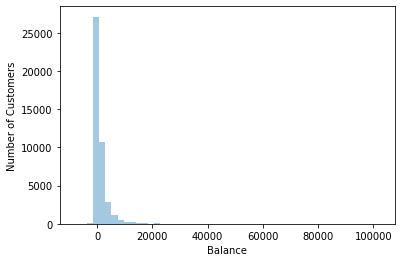

In [210]:
sns.distplot(bank_data['balance'], kde=False) 
# More than 80% of customers have balance < 2000
plt.xlabel('Balance')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

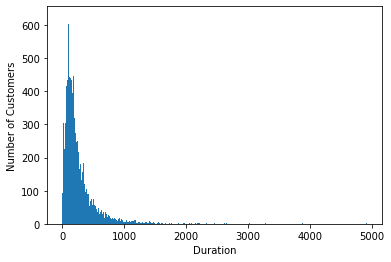

In [211]:
sns.distplot(bank_data['duration'], kde=False, hist_kws={"alpha": 1}, bins=bank_data['duration'].nunique()) 
# More than 80% of customers, the contact duration was < 500 seconds
plt.xlabel('Duration')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

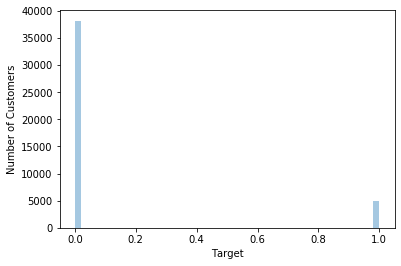

In [212]:
sns.distplot(bank_data['Target'], kde=False) 
# Out of 45211 customers, 5289 customers subscribed term deposit which is  11.69%
plt.xlabel('Target')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

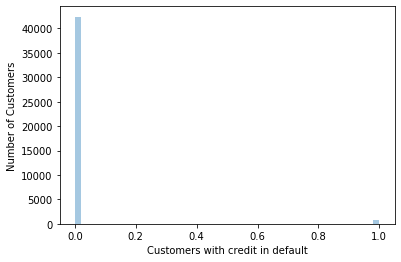

In [213]:
sns.distplot(bank_data['default'], kde=False) 
# Out of 45211 customers, 44396 customers dont have credit in default, which is 98%
plt.xlabel('Customers with credit in default')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

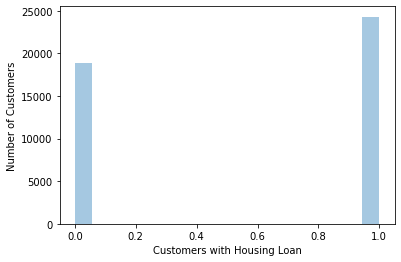

In [214]:
sns.distplot(bank_data['housing'], kde=False) 
# Out of 45211 customers, 25130 customers have housing loan, so 55% of customers have it.
plt.xlabel('Customers with Housing Loan')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

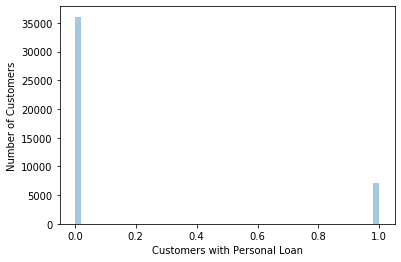

In [215]:
sns.distplot(bank_data['loan'], kde=False) 
# Out of 45211 customers, 37967 customers don't have personal loan, so 83.9% of customers dont have personal loan
plt.xlabel('Customers with Personal Loan')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

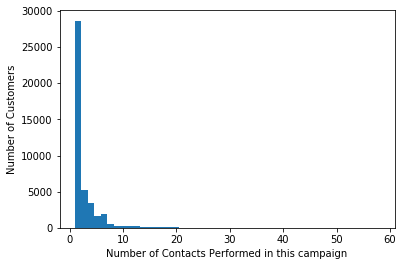

In [216]:
sns.distplot(bank_data['campaign'], kde=False, hist_kws={"alpha": 1}, bins=bank_data['campaign'].nunique()) 
# Out of 45211 customers, more than 90% customers were contacted less than 5 times during this campaign
plt.xlabel('Number of Contacts Performed in this campaign')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

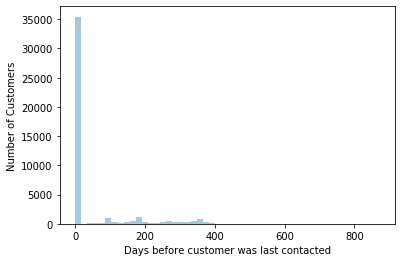

In [217]:
sns.distplot(bank_data['pdays'], kde=False) 
# Out of 45211 customers, more than 80% customers were last contacted 2.5 years back or never contacted(new customers)
plt.xlabel('Days before customer was last contacted')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

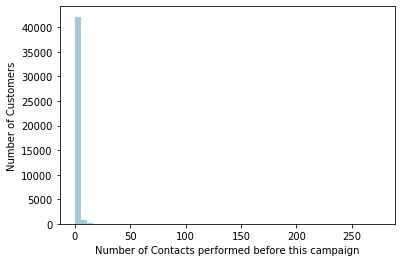

In [218]:
sns.distplot(bank_data['previous'], kde=False) 
# Out of 45211 customers, more than 80% customers were not contacted in last campaign (it could be new customers)
plt.xlabel('Number of Contacts performed before this campaign')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

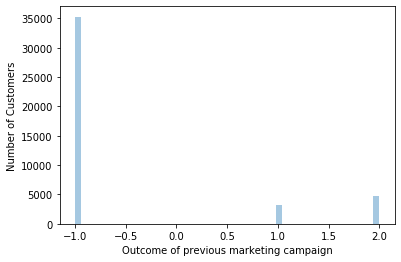

In [219]:
sns.distplot(bank_data['poutcome'], kde=False) 
# Out of 45211 customers, the outcome of previous campaign was 3% customers subscribed term deposit and more than 80% customers the outcome was unknwown
plt.xlabel('Outcome of previous marketing campaign')
plt.ylabel('Number of Customers')

In [220]:
bank_data_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [221]:
bank_data.skew()
# Education, Housing, martia_married and contact_cellular are negatively skewed
# previous, job_unknown are positively skewed

age                   0.697836
education            -0.177459
default               7.228837
balance               8.400121
housing              -0.251600
loan                  1.809614
day                   0.089800
month                 0.244920
duration              3.170180
campaign              4.792494
pdays                 2.608338
previous             42.088778
poutcome              1.789466
Target                2.394662
job_admin.            2.402065
job_blue-collar       1.388928
job_entrepreneur      5.258071
job_housemaid         5.759820
job_management        1.399328
job_retired           4.146088
job_self-employed     5.008604
job_services          2.808947
job_student           7.263253
job_technician        1.754436
job_unemployed        5.562014
job_unknown           0.000000
marital_divorced      2.392203
marital_married      -0.411237
marital_single        0.964086
contact_cellular     -0.643714
contact_telephone     3.619457
contact_unknown       0.955618
dtype: f

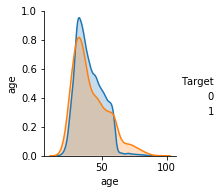

In [222]:
sns.pairplot(bank_data,vars=["age"],hue='Target')

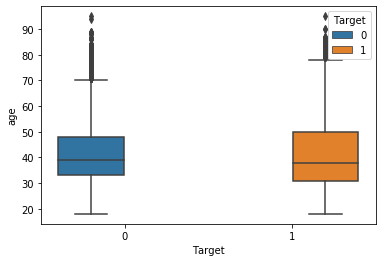

In [223]:
sns.boxplot(x='Target',y='age',hue='Target',data=bank_data)
# For customers who subscribed to term deposit, median age is almost same.so age is not a factor in deciding which customer would take term deposit

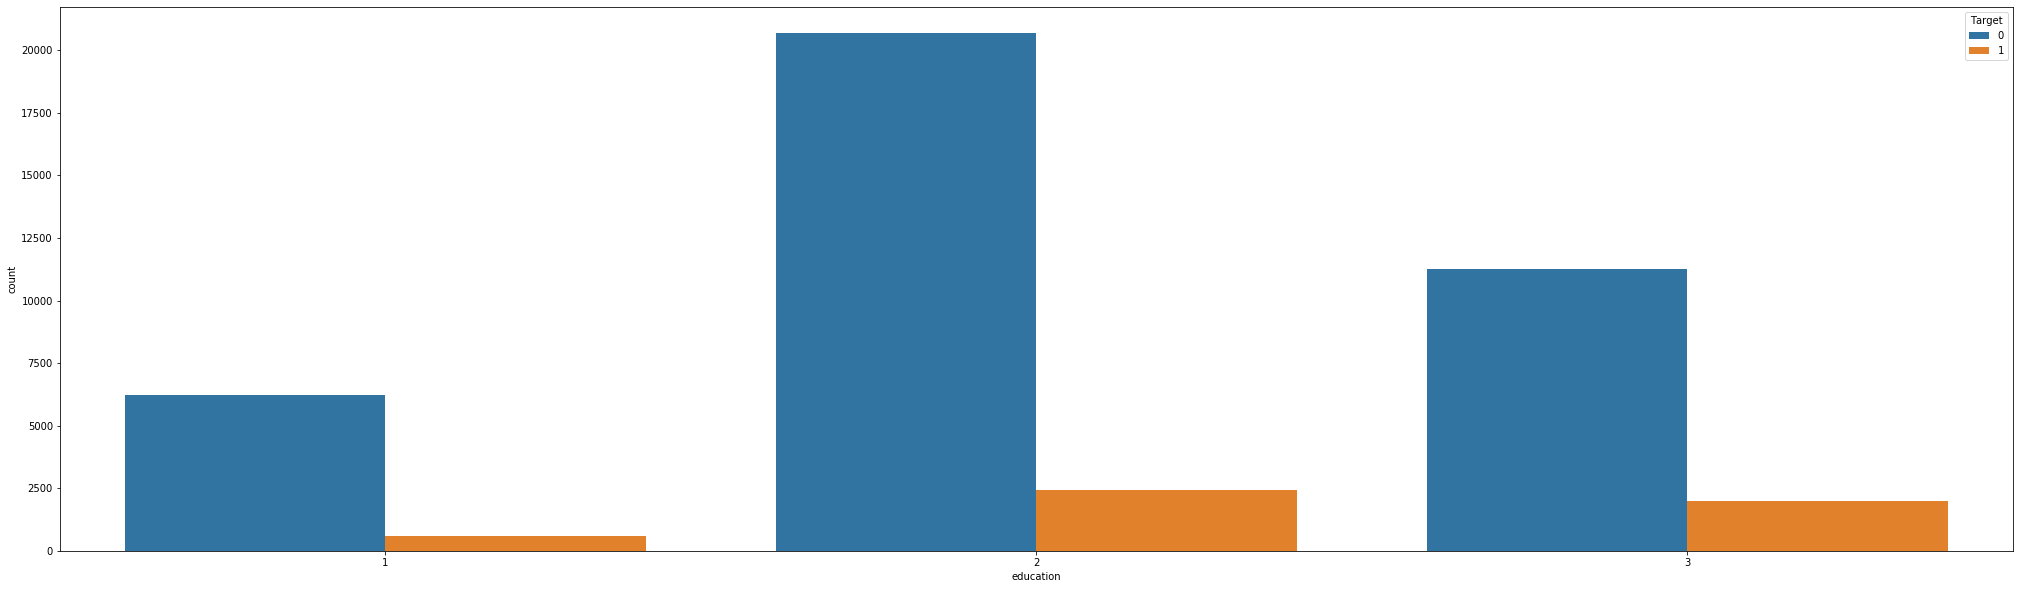

In [224]:
plt.figure(figsize=(35,10)) 
sns.countplot(x="education", data=bank_data,hue="Target")
# Out of 5289 customers who subscribed to term deposit, 46% of customers are having secondary education and 37% customers are having tertiary education

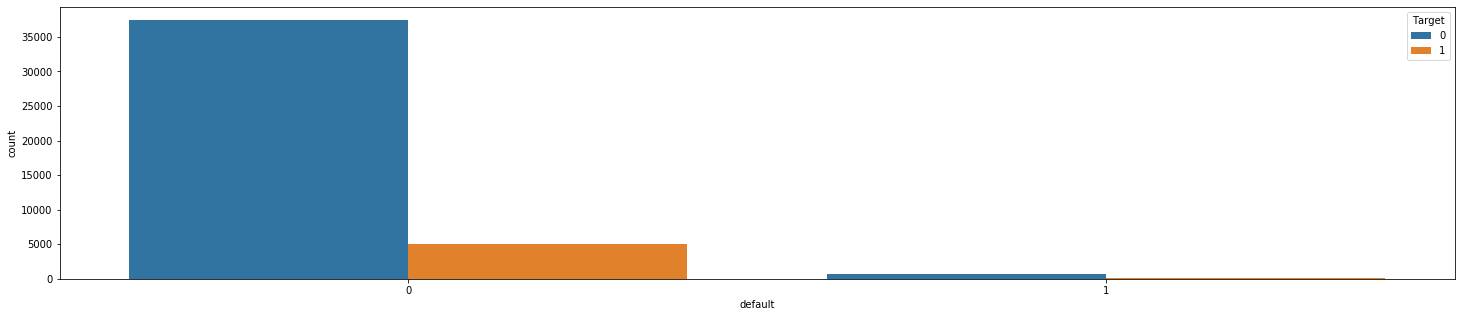

In [225]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="default", data=bank_data,hue="Target")
# Out of 5289 customers who subscribed to term deposit, 99% of customers did not have credit card default

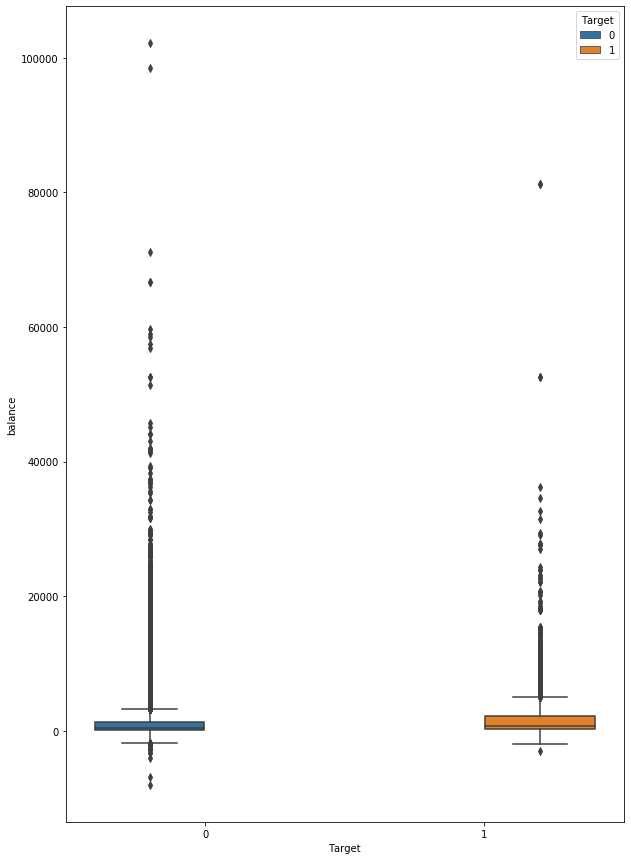

In [226]:
plt.figure(figsize=(10,15)) 
sns.boxplot(x='Target',y='balance',hue='Target',data=bank_data)
# For customers who subscribed to term deposit, median balance is almost same.so balance is not a factor in deciding which customer would take term deposit

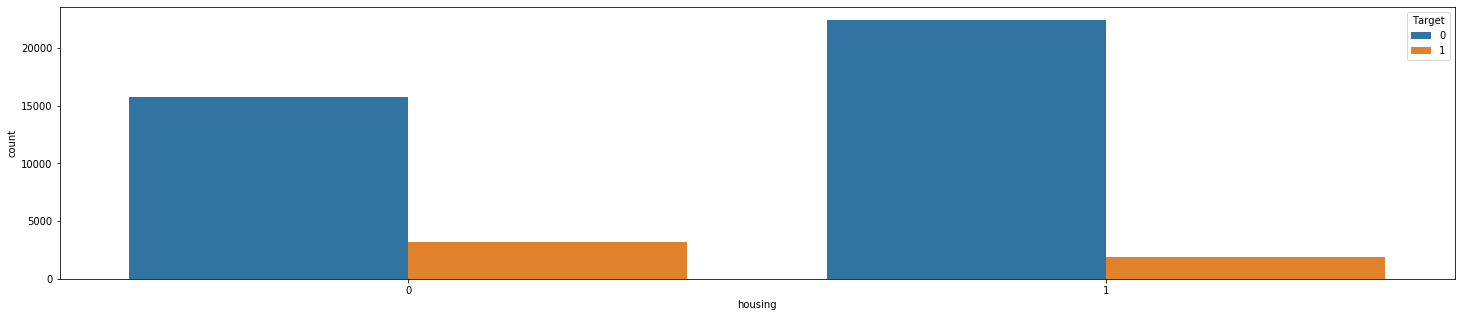

In [227]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="housing", data=bank_data,hue="Target")
# out of 5289 customers who subscribed term deposit, 63% of customers didnt have housing loan

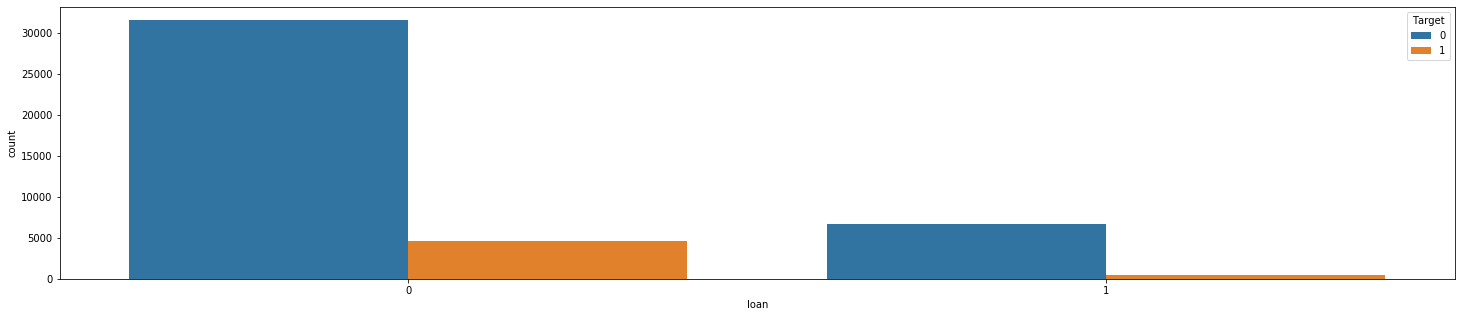

In [228]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="loan", data=bank_data,hue="Target")
# out of 5289 customers who subscribed term deposit, 90% of customers didnt have personal loan

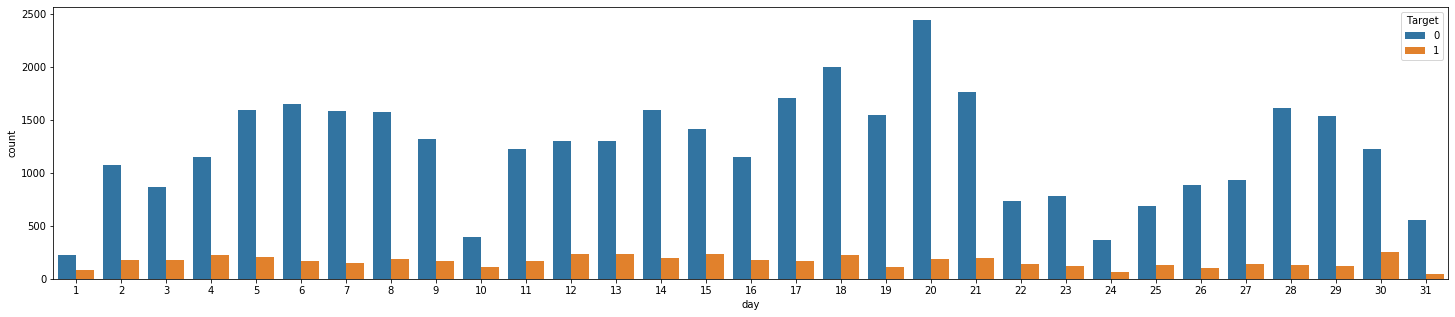

In [229]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="day", data=bank_data,hue="Target")
# Last contact day does not have any affect on people subscribing term deposit, we can drop it.

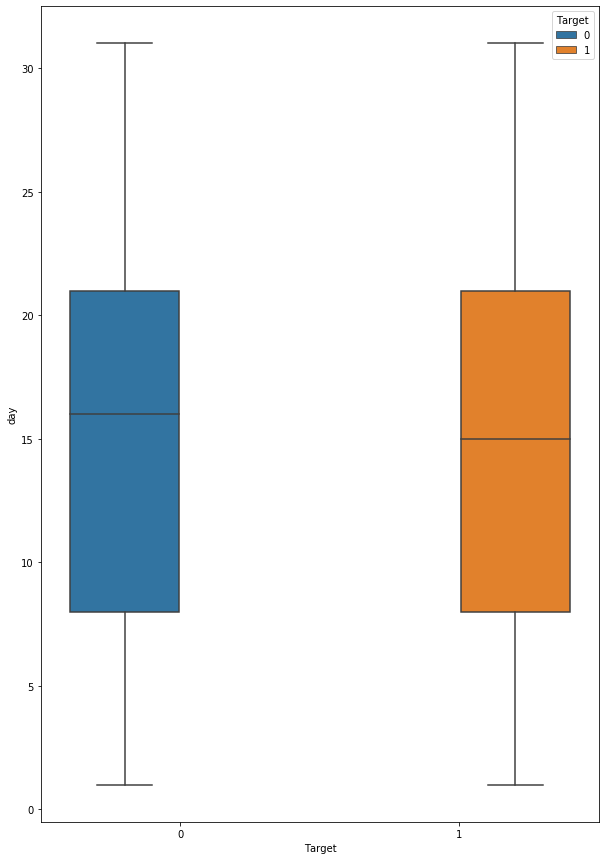

In [230]:
plt.figure(figsize=(10,15)) 
sns.boxplot(x='Target',y='day',hue='Target',data=bank_data)
# Last contact day does not have any affect on people subscribing term deposit, we can drop it.

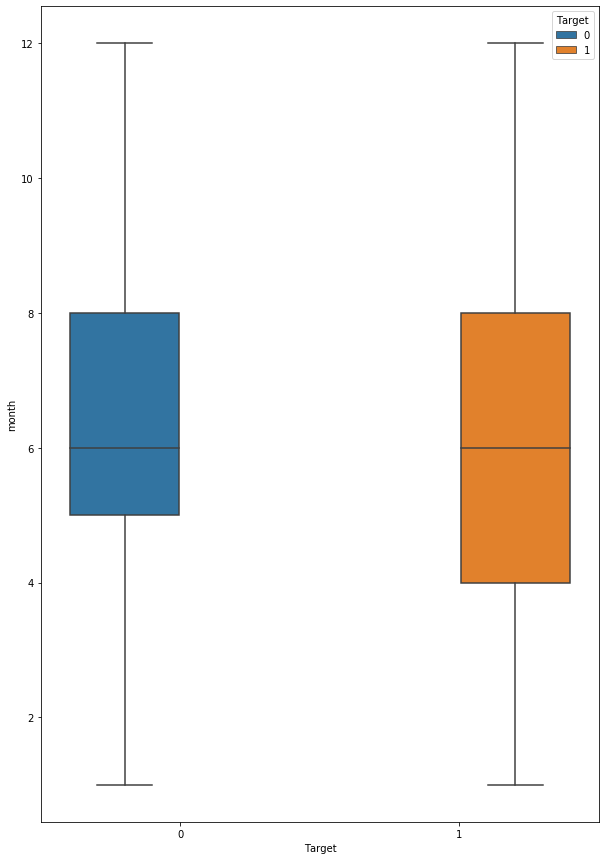

In [231]:
plt.figure(figsize=(10,15)) 
sns.boxplot(x='Target',y='month',hue='Target',data=bank_data)
# Out of 5289 customers who subscribed to term deposit, 57% customers took subscription between may-september (5 months)

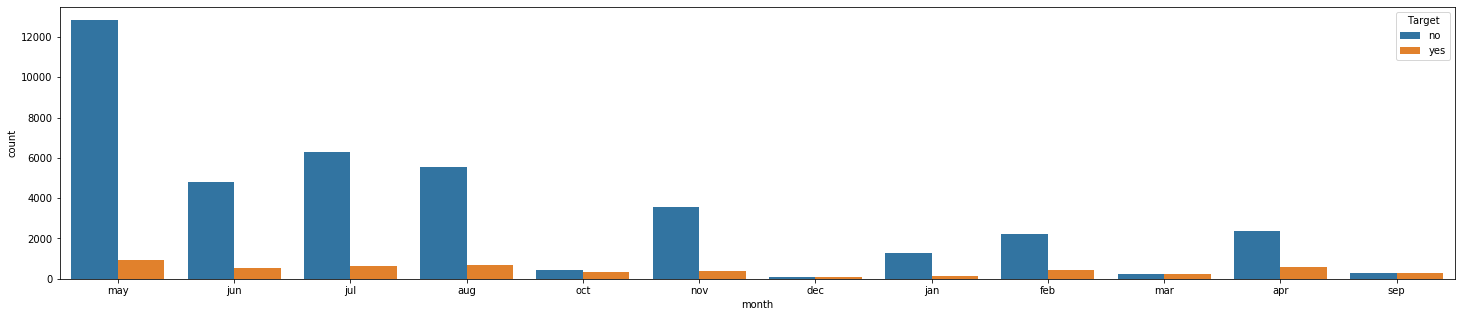

In [232]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="month", data=bank_data_original,hue="Target")
# Out of 5289 customers who subscribed to term deposit, 57% customers took subscription between may-september (5 months)

<Figure size 1800x360 with 0 Axes>

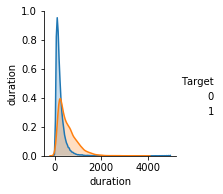

In [233]:
plt.figure(figsize=(25,5)) 
sns.pairplot(bank_data,vars=["duration"],hue='Target')
# Out of 45211 customers, for the customers who subscribed to term deposit, the contact duration was almost twice when compared to customers who didnt subscibe to term deposit

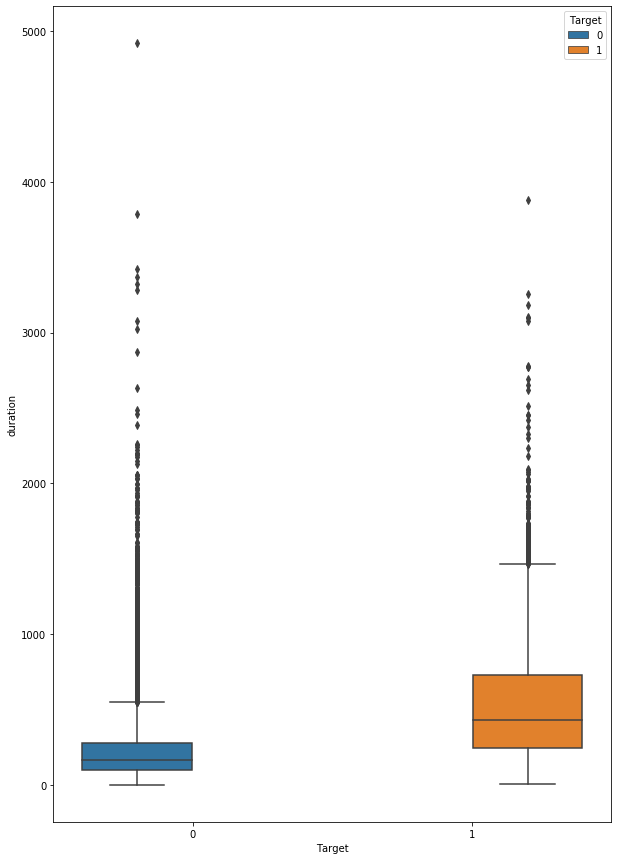

In [234]:
plt.figure(figsize=(10,15)) 
sns.boxplot(x='Target',y='duration',hue='Target',data=bank_data)
# Out of 45211 customers, for the customers who subscribed to term deposit, the contact duration was almost twice when compared to customers who didnt subscibe to term deposit

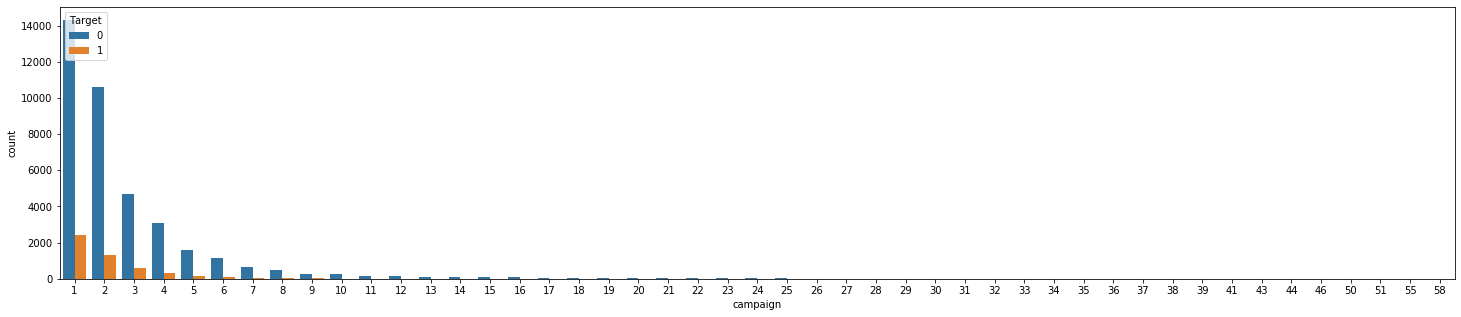

In [235]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="campaign", data=bank_data,hue="Target")
# Increasing number of campaigns does not have much effect on customers subscribing term deposit, this field can be dropped

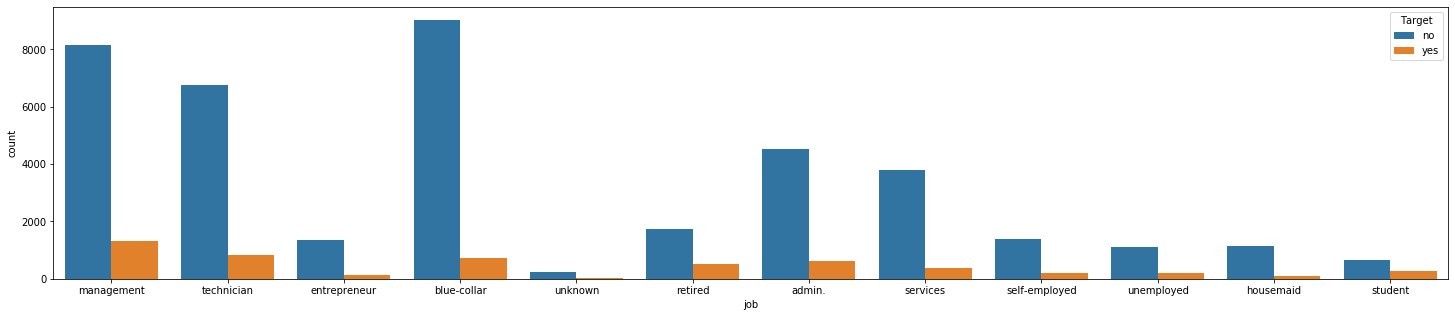

In [236]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="job", data=bank_data_original,hue="Target")
# Out of 5289 customers who subscribed to term deposit, 1301/5289 (24.5%) were having management job, followed by technician (840/5289 = 15%)

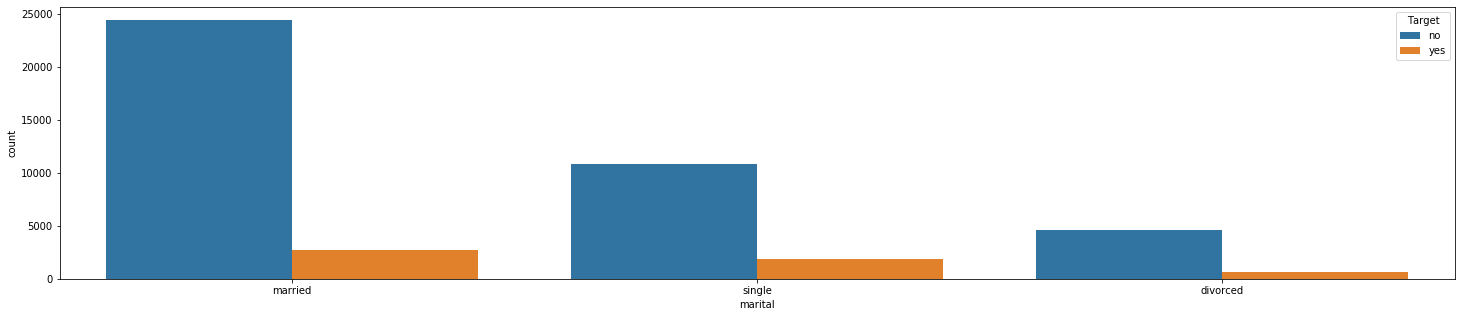

In [237]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="marital", data=bank_data_original,hue="Target")
# Out of 5289 customers who subscribed to term deposit, 2755/5289 = 52% of the customers are married, followed by 1912/5289 = 36% of customers are singles

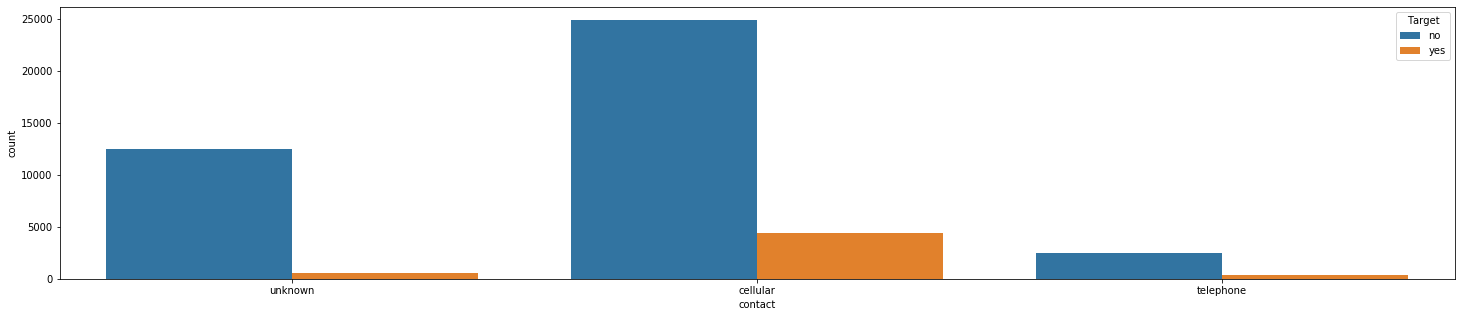

In [238]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="contact", data=bank_data_original,hue="Target")
# Out of 5289 customers who subscribed term deposit, 4369/5289 customers  = 82.6% of customers had cellular contact

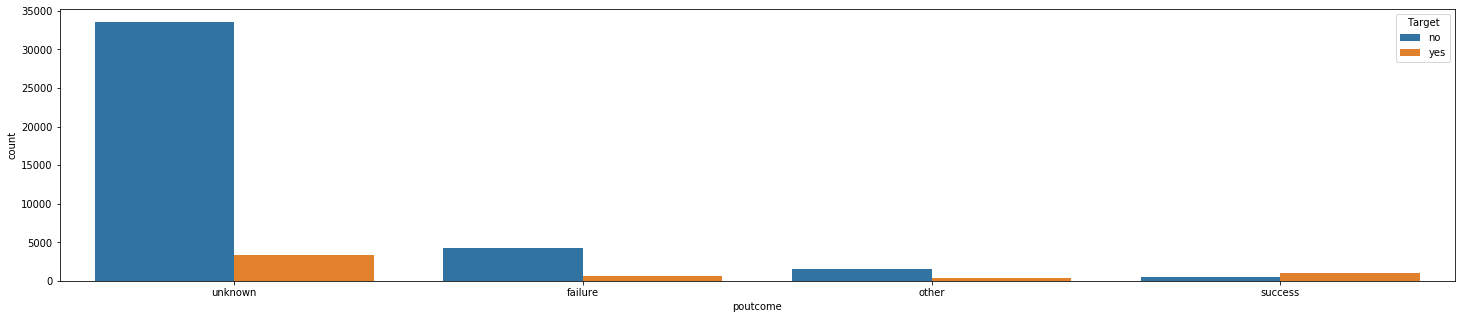

In [239]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="poutcome", data=bank_data_original,hue="Target")
# For the customers for which the outcome of previous campaign is known, high % of customers subscribed term deposit. So previous campaign was a successfull one.

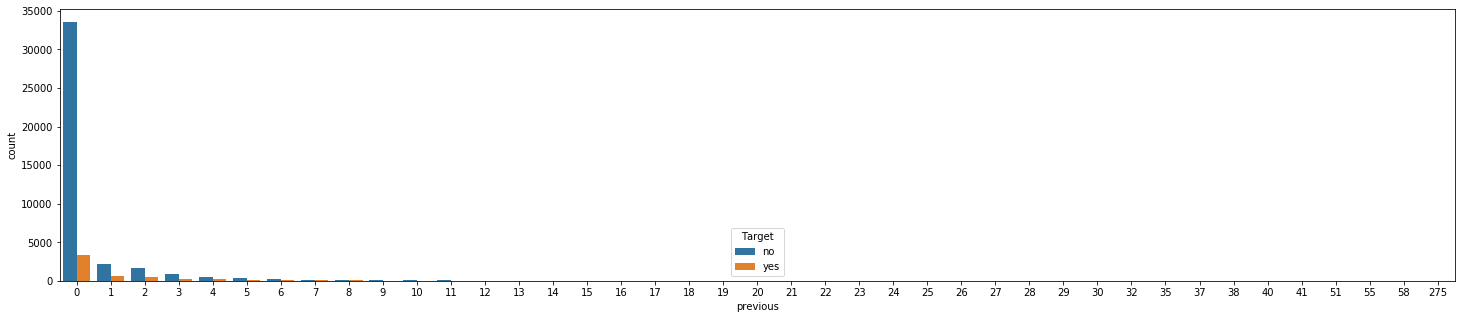

In [240]:
plt.figure(figsize=(25,5)) 
sns.countplot(x="previous", data=bank_data_original,hue="Target")
# out of 45211 customers, 42974/45211 =  95% of customers were contacted less than 5 times in last campaign
# Out of 5289 customers who subscribed term deposit, 5009/5289 = 94% of customeers were contacted less than 5 times in last campaign

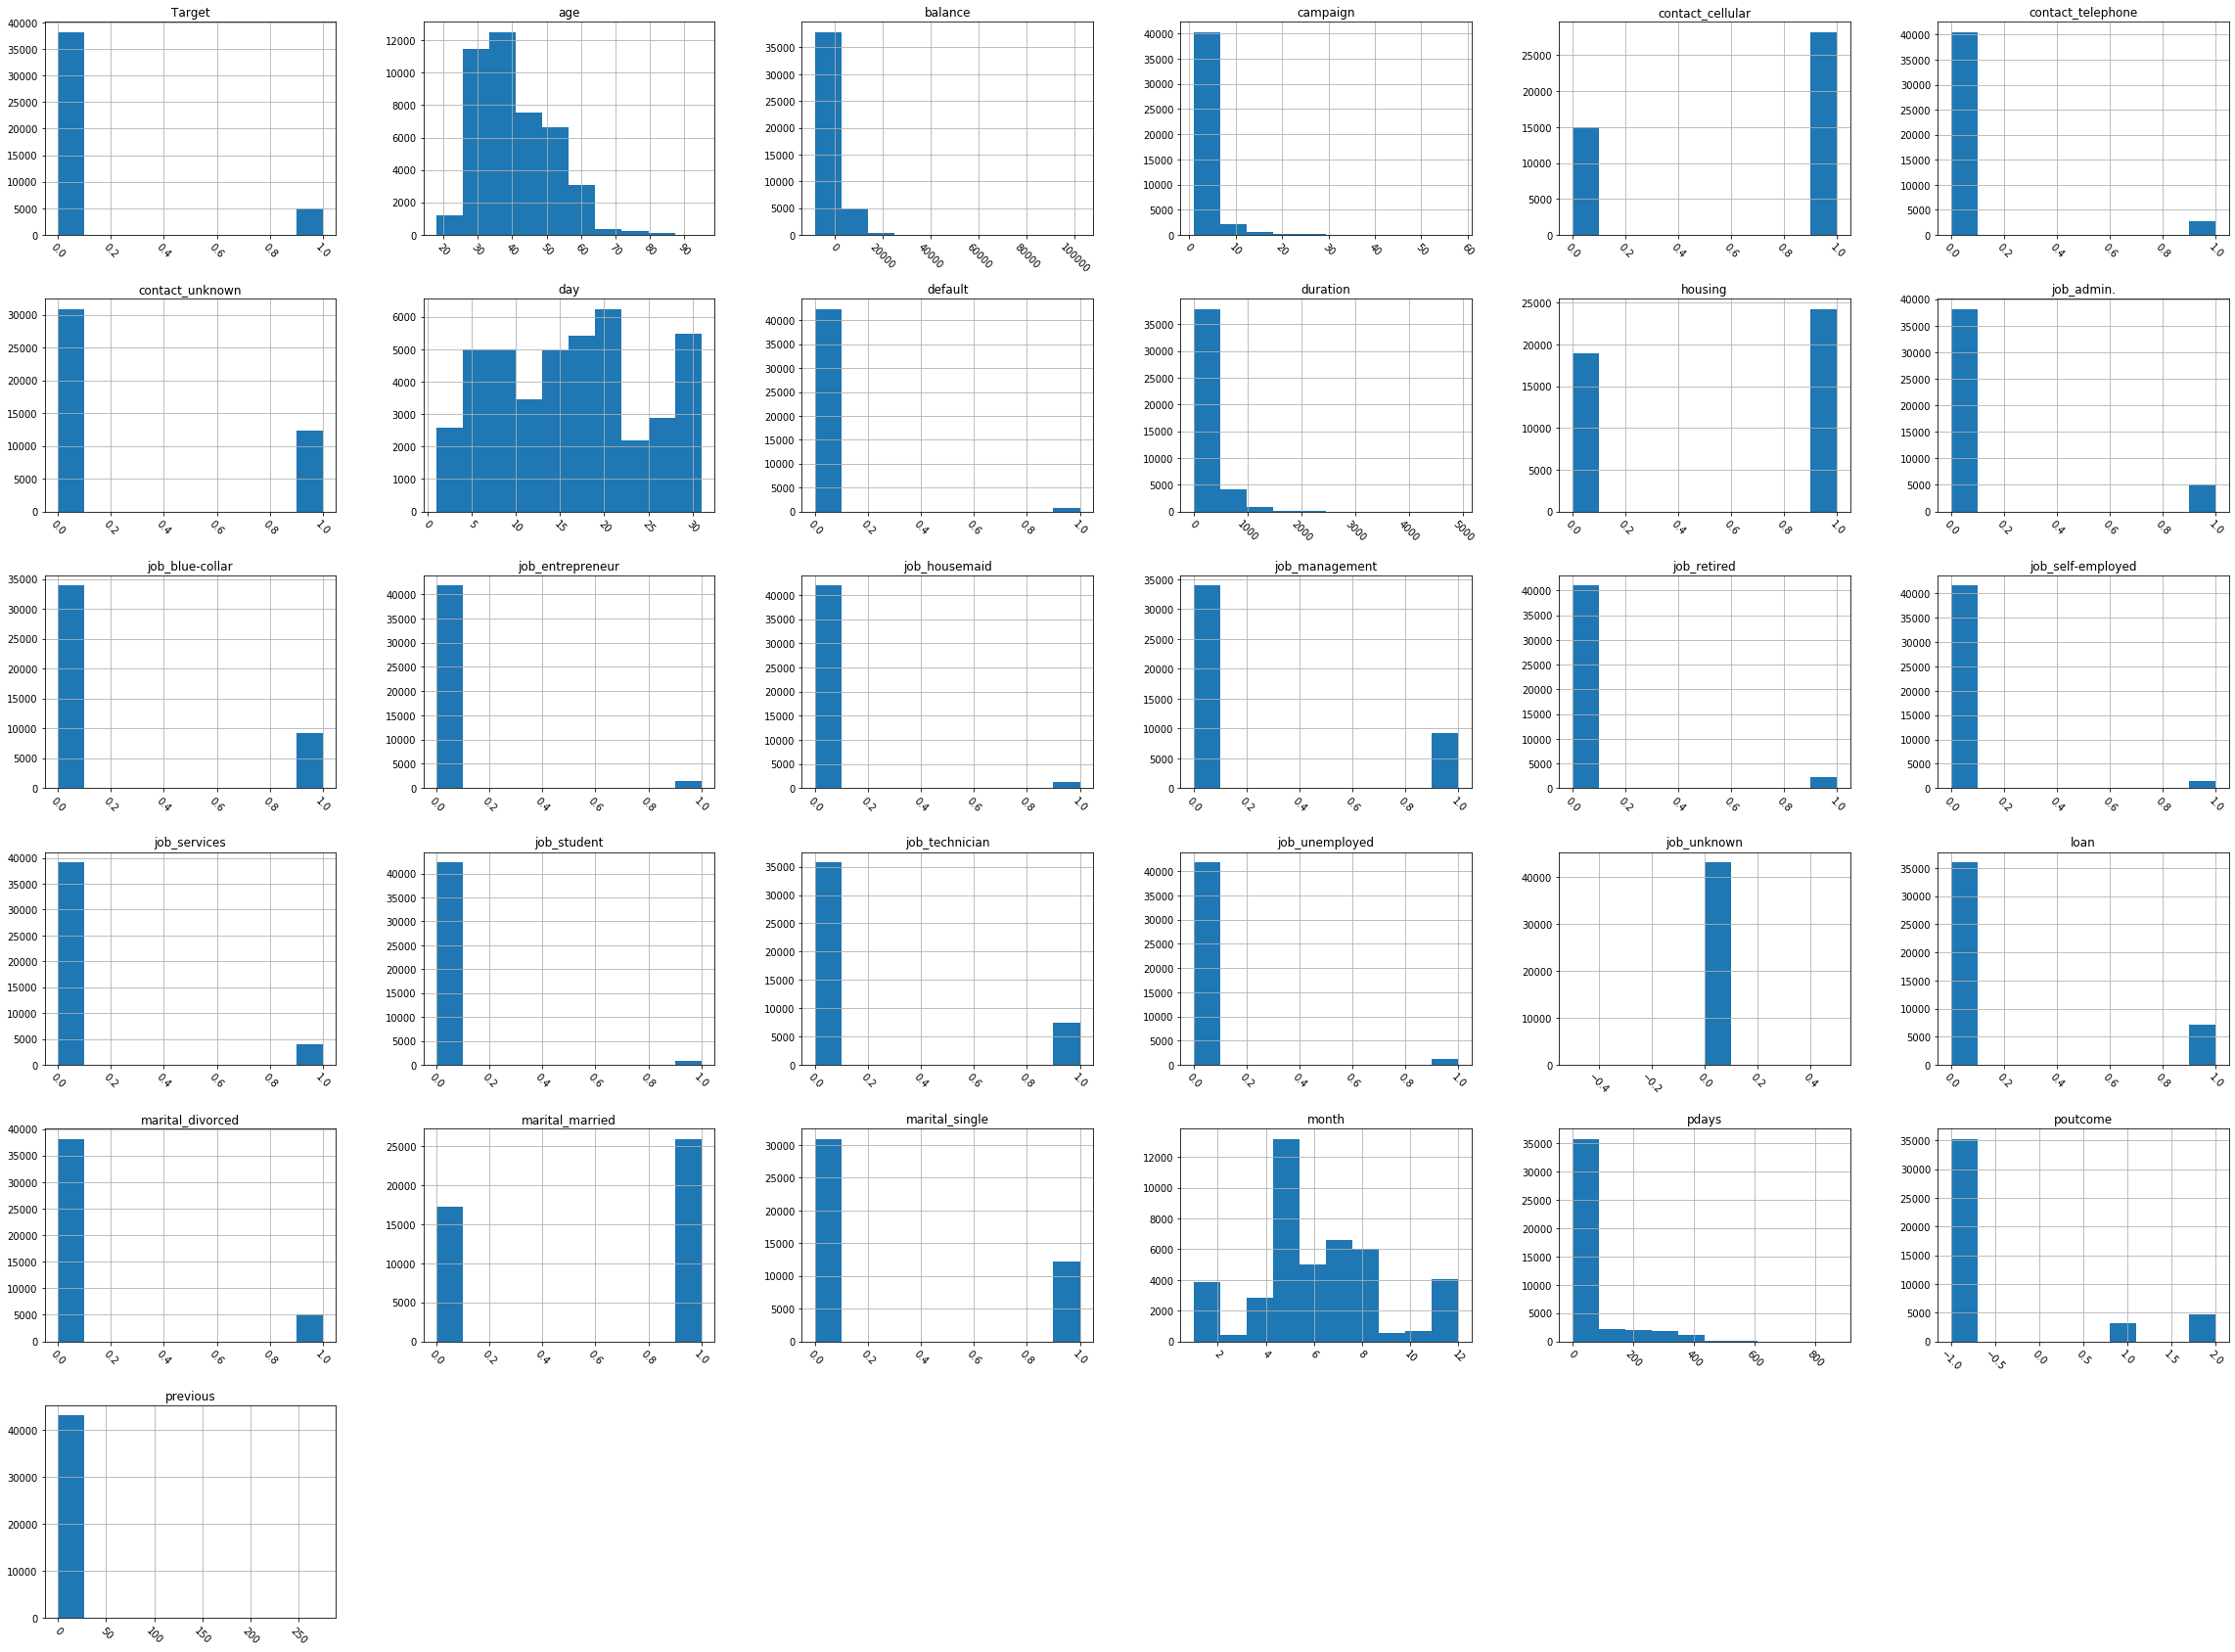

In [241]:
bank_data.hist(figsize=(40,30), xrot=-45)
#Clear the text "residue"
plt.show()

In [242]:
## Univariate Analysis Results
# Out of 5289 customers who subscribed to term deposit, 86% of customers are between age group 25-60 and biggest subgroup being in age group 30-40
# Out of 5289 customers who subscribed to term deposit, 46% of customers are having secondary education and 37% customers are having tertiary education
# Out of 5289 customers who subscribed to term deposit, 99% of customers did not have credit card default
# out of 5289 customers who subscribed term deposit, 63% of customers didnt have housing loan
# out of 5289 customers who subscribed term deposit, 90% of customers didnt have personal loan
# Last contact day does not have any affect on people subscribing term deposit, we can drop it.
# Out of 5289 customers who subscribed to term deposit, 57% customers took subscription between may-september (5 months)
# Out of 45211 customers, for the customers who subscribed to term deposit, the contact duration was almost twice when compared to customers who didnt subscibe to term deposit
# Increasing number of campaigns does not have much effect on customers subscribing term deposit, this field can be dropped
# Out of 5289 customers who subscribed to term deposit, 1301/5289 (24.5%) were having management job, followed by technician (840/5289 = 15%)
# Out of 5289 customers who subscribed to term deposit, 2755/5289 = 52% of the customers are married, followed by 1912/5289 = 36% of customers are singles
# Out of 5289 customers who subscribed term deposit, 4369/5289 customers  = 82.6% of customers had cellular contact
# For the customers for which the outcome of previous campaign is known, high % of customers subscribed term deposit. So previous campaign was a successfull one.
# out of 45211 customers, 42974/45211 =  95% of customers were contacted less than 5 times in last campaign
# Out of 5289 customers who subscribed term deposit, 5009/5289 = 94% of customeers were contacted less than 5 times in last campaign
# People whose communication contact type is cellular and with good contact duration have subscribed to term deposit
# Most customers of bank are between 30-40 yrs of age
# Most customers of bank are having secondary education followed by tertiary
# More than 80% of customers have balance < 2000
# More than 80% of customers, the contact duration was < 500 seconds
# Month which had the highest activity was May
# Most customers of bank were last contacted on 20th
# Out of 45211 customers, 5289 customers subscribed term deposit which is  11.69%
# Out of 45211 customers, the outcome of previous campaign was 3% customers subscribed term deposit and more than 80% customers the outcome was unknwown
# Out of 45211 customers, more than 80% customers were not contacted in last campaign
# Out of 45211 customers, more than 80% customers were last contacted 2.5 years back
# Out of 45211 customers, 44396 customers dont have credit in default, which is 98%
# Out of 45211 customers, 25130 customers have housing loan, so 55% of customers have it.
# Out of 45211 customers, 37967 customers don't have personal loan, so 83.9% of customers dont have personal loan
# Out of 45211 customers, more than 90% customers were contacted less than 5 times during this campaign

## Multivariate Analysis

In [243]:
bank_data.corr().transpose()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
age,1.000000,-0.016245,0.097602,-0.185152,-0.010029,-0.008451,0.094109,-0.004953,0.004050,-0.023248,...,-0.185952,-0.068533,0.002650,NaN,0.169244,0.280298,-0.425297,-0.060371,0.162400,-0.023361
default,-0.016245,1.000000,-0.066458,-0.009031,0.076025,0.008823,0.015964,-0.011040,0.016441,-0.029721,...,-0.014430,-0.002846,0.007117,NaN,0.017309,-0.014092,0.002998,-0.009044,-0.017789,0.019077
balance,0.097602,-0.066458,1.000000,-0.067037,-0.084378,0.004118,0.094138,0.020051,-0.016251,0.003928,...,0.000699,-0.017577,0.009611,NaN,-0.022024,0.026283,-0.012897,0.015960,0.038361,-0.037400
housing,-0.185152,-0.009031,-0.067037,1.000000,0.037004,-0.029826,-0.175594,0.004017,-0.025554,0.124762,...,-0.070618,-0.020175,-0.051169,NaN,-0.001423,0.018183,-0.018758,-0.160233,-0.078181,0.210952
loan,-0.010029,0.076025,-0.084378,0.037004,1.000000,0.010957,0.020067,-0.013230,0.010447,-0.024369,...,-0.055282,0.012427,-0.037138,NaN,0.015516,0.038101,-0.052478,0.009553,-0.009882,-0.004781
day,-0.008451,0.008823,0.004118,-0.029826,0.010957,1.000000,0.105959,-0.030074,0.164982,-0.094343,...,-0.012185,0.032612,-0.006593,NaN,0.000046,0.006203,-0.006778,0.017651,0.021490,-0.030141
month,0.094109,0.015964,0.094138,-0.175594,0.020067,0.105959,1.000000,-0.013339,0.055813,-0.111210,...,-0.019209,0.040739,-0.040999,NaN,-0.000589,0.062512,-0.067555,0.154022,0.039765,-0.183807
duration,-0.004953,-0.011040,0.020051,0.004017,-0.013230,-0.030074,-0.013339,1.000000,-0.083118,-0.002403,...,-0.004821,-0.009373,0.019084,NaN,0.004496,-0.022105,0.020835,0.024515,-0.023473,-0.013280
campaign,0.004050,0.016441,-0.016251,-0.025554,0.010447,0.164982,0.055813,-0.083118,1.000000,-0.088920,...,-0.020811,0.023050,-0.020183,NaN,-0.015694,0.030353,-0.021829,-0.029918,0.052258,0.003551
pdays,-0.023248,-0.029721,0.003928,0.124762,-0.024369,-0.094343,-0.111210,-0.002403,-0.088920,1.000000,...,0.023918,-0.014212,-0.010163,NaN,0.001859,-0.027444,0.028519,0.224576,0.015920,-0.245458


C:\Users\pmenon001c\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\pmenon001c\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1080x360 with 0 Axes>

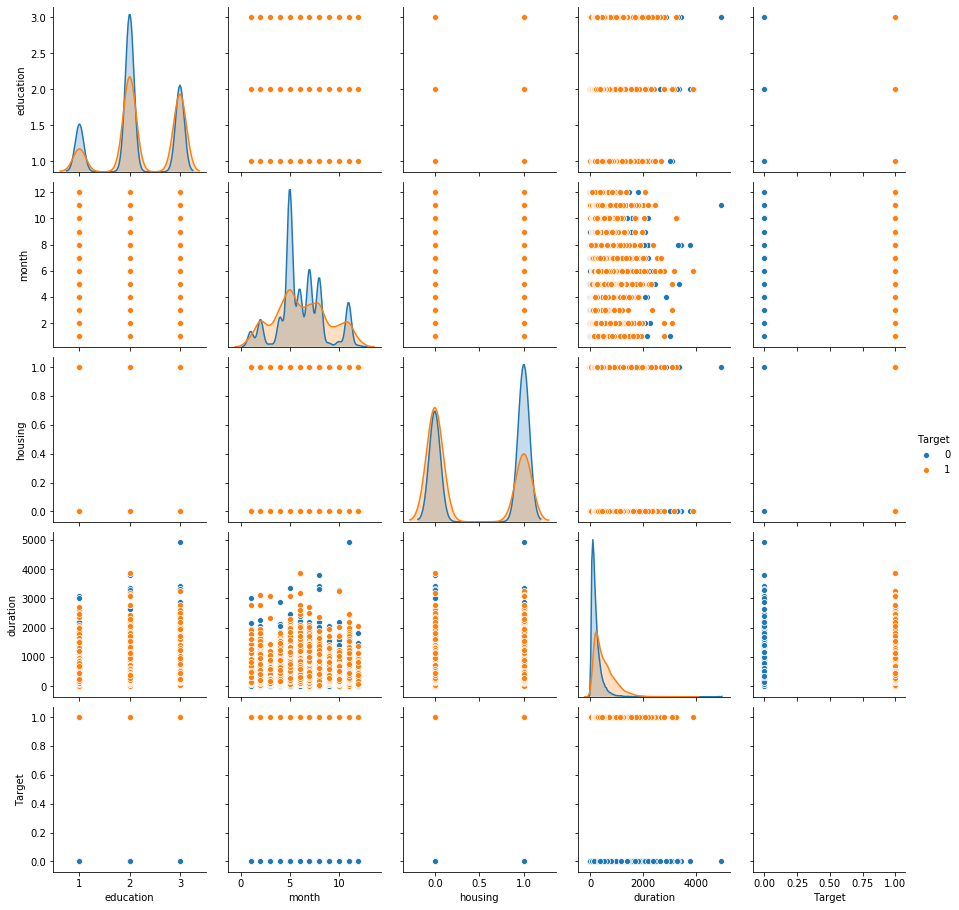

In [244]:
plt.figure(figsize=(15,5)) 
sns.pairplot(bank_data,vars=["education", "month", "housing", "duration","Target"],hue='Target')

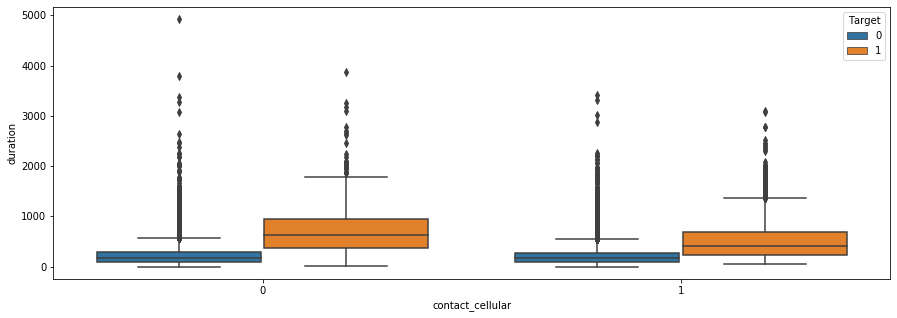

In [245]:
plt.figure(figsize=(15,5)) 
sns.boxplot(x='contact_cellular',y='duration',hue='Target',data=bank_data)
# People whose communication contact type is cellular and with good contact duration have subscribed to term deposit

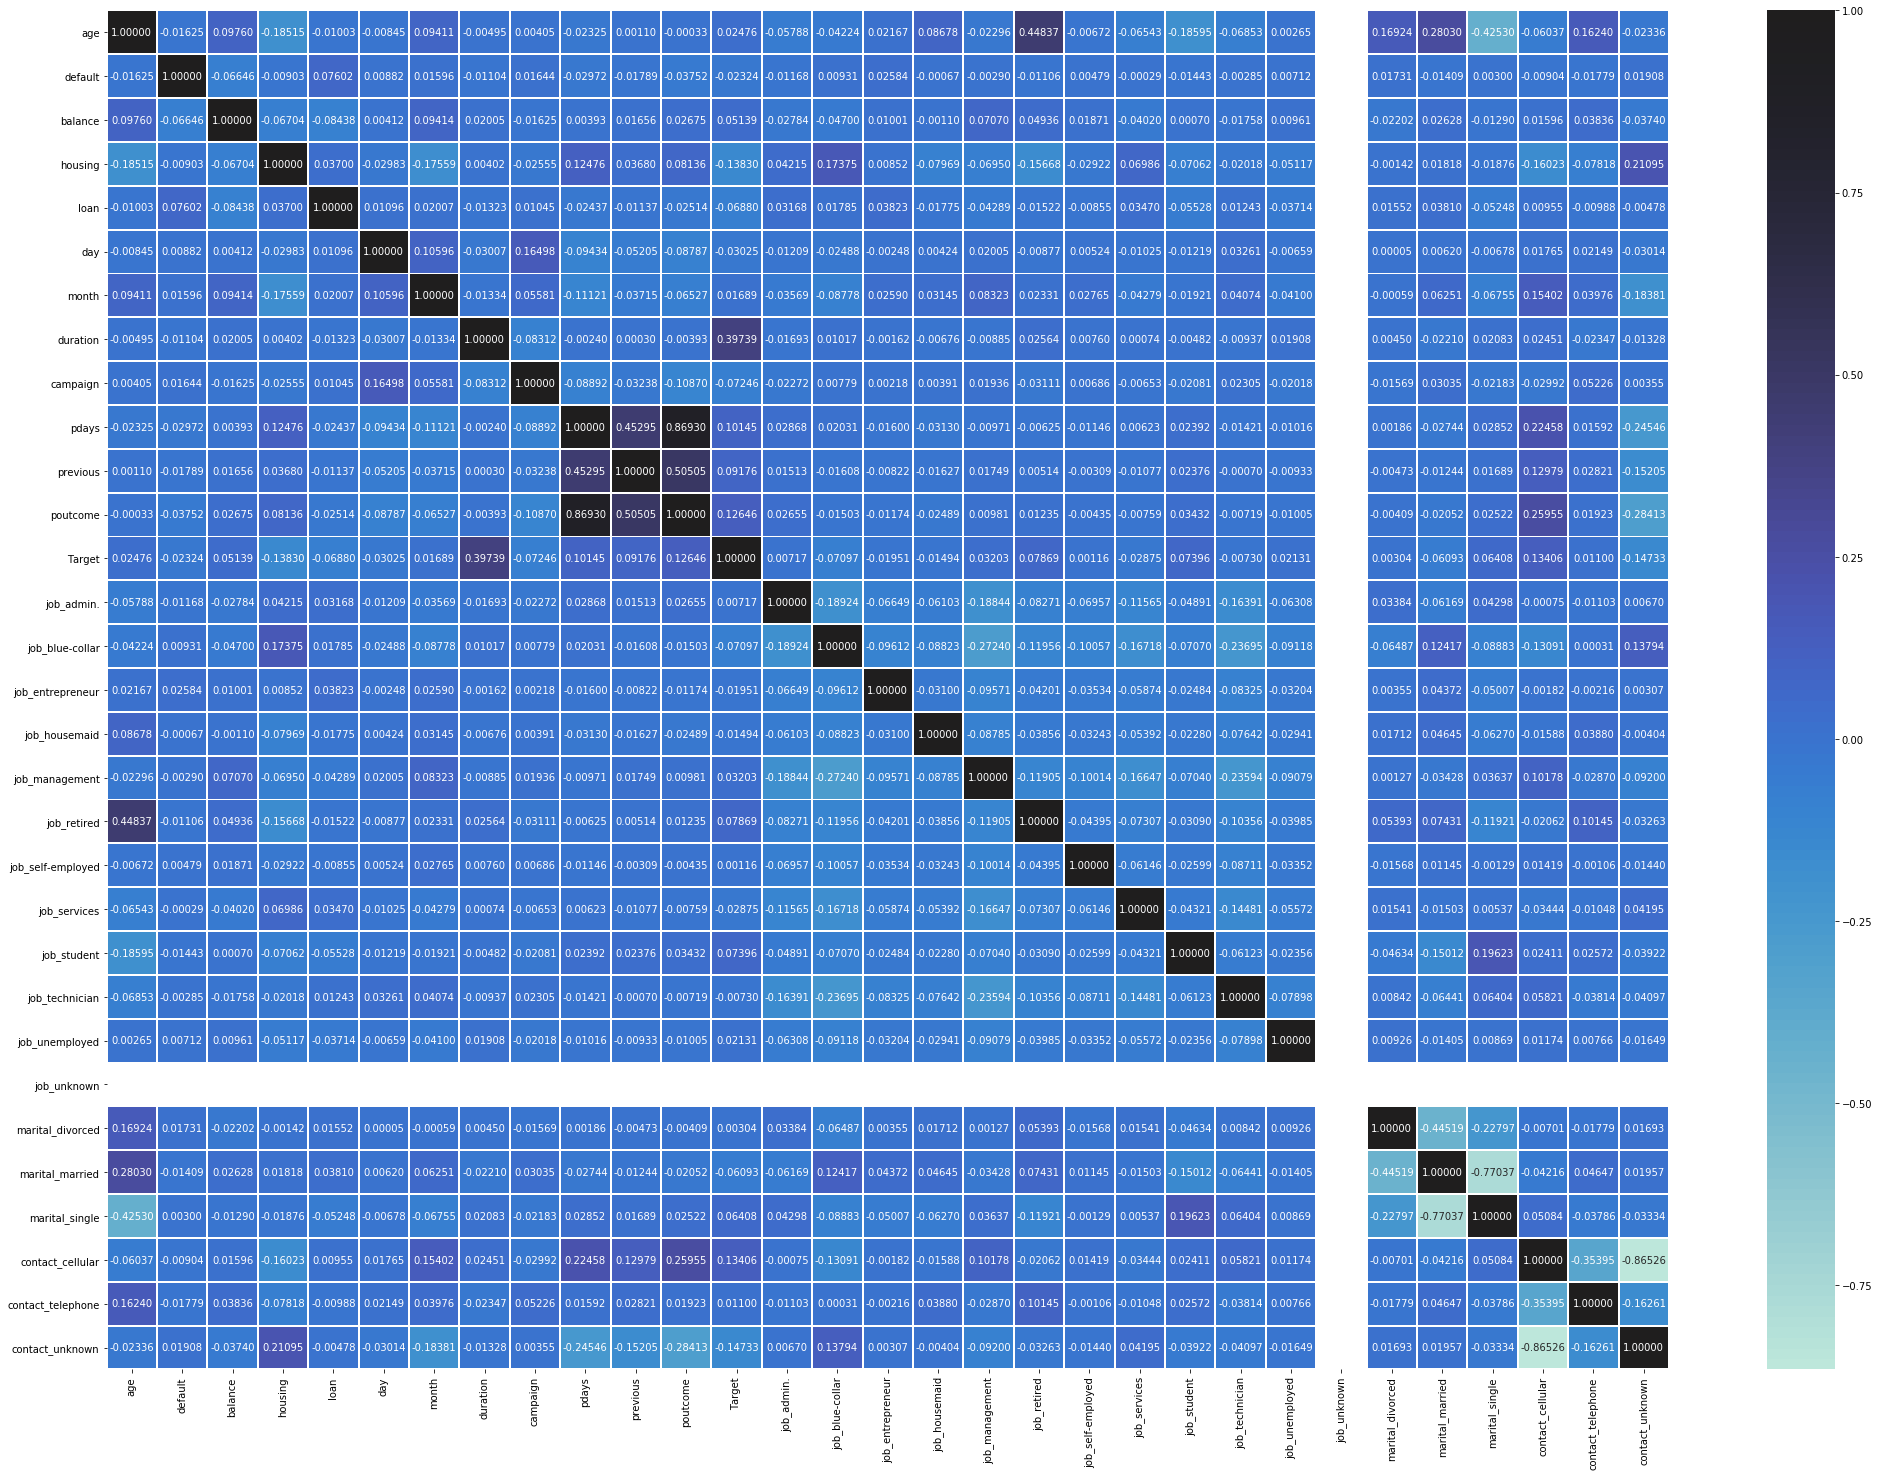

In [246]:
plt.figure(figsize=(35,25))
sns.heatmap(bank_data.corr(), annot=True, linewidths=.9, fmt= '.5f', center = 1 )  # heatmap
plt.show()

In [247]:
print(bank_data.head())
print(bank_data_original.head())

   age education  default  balance  housing  loan  day  month  duration  \
0   58         3        0     2143        1     0    5      5       261   
1   44         2        0       29        1     0    5      5       151   
2   33         2        0        2        1     1    5      5        76   
5   35         3        0      231        1     0    5      5       139   
6   28         3        0      447        1     1    5      5       217   

   campaign  ...  job_student  job_technician  job_unemployed  job_unknown  \
0         1  ...            0               0               0            0   
1         1  ...            0               1               0            0   
2         1  ...            0               0               0            0   
5         1  ...            0               0               0            0   
6         1  ...            0               0               0            0   

   marital_divorced  marital_married  marital_single  contact_cellular  \
0     

In [248]:
# Multivariate Results
# Customers who subscribed term deposit have a positive corelation with the customers having high duration of contact
# Customers who subscribed term deposit have a positive corelation with the customers having cellular connectivity
# Customers who subscribed term deposit have a negative corelation with customers having housing loan or personal loan

## Deliverable – 2 (Prepare the data for analytics) – (10)

In [249]:
# 1. Ensure the attribute types are correct. If not, take appropriate actions.
# 2. Get the data model ready.
# 3. Transform the data i.e. scale / normalize if required
# 4. Create the training set and test set in ratio of 70:30

In [250]:
# Data type already corrected
# Hot encoding already completed
# Since data is imbalanced, going to use SMOTE to balance it

# Dropping columns which are not needed

In [251]:
bank_data.drop('day',axis=1,inplace=True)
bank_data.drop('campaign',axis=1,inplace=True)

In [252]:
from sklearn.model_selection import train_test_split

x = bank_data.drop('Target',axis=1)     # Predictor feature columns
y = bank_data['Target']   # Predicted class (1=True, 0=False)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # 1 is just any random seed number

x_train.head()

,age,education,default,balance,housing,loan,month,duration,pdays,previous,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
39750,57,3,0,0,0,0,5,141,-1,0,...,0,0,0,0,0,1,0,1,0,0
19900,45,3,0,3168,0,0,8,109,-1,0,...,0,1,0,0,0,1,0,1,0,0
32563,39,3,0,0,0,0,4,486,-1,0,...,0,0,0,0,0,1,0,1,0,0
2493,52,2,0,1635,1,0,5,730,-1,0,...,0,0,0,0,1,0,0,0,0,1
15286,40,2,0,2998,1,0,7,623,-1,0,...,0,0,0,0,1,0,0,1,0,0


## Oversampling of data since class is imbalanced

In [253]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train.ravel())

In [254]:
bank_data.head()

,age,education,default,balance,housing,loan,month,duration,pdays,previous,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,5,261,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,151,-1,0,...,0,1,0,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,76,-1,0,...,0,0,0,0,0,1,0,0,0,1
5,35,3,0,231,1,0,5,139,-1,0,...,0,0,0,0,0,1,0,0,0,1
6,28,3,0,447,1,1,5,217,-1,0,...,0,0,0,0,0,0,1,0,0,1


In [255]:
print("Original PL Accepted True Values    : {0} ({1:0.2f}%)".format(len(bank_data.loc[bank_data['Target'] == 1]), (len(bank_data.loc[bank_data['Target'] == 1])/len(bank_data.index)) * 100))
print("Original PL Not Accepted False Values   : {0} ({1:0.2f}%)".format(len(bank_data.loc[bank_data['Target'] == 0]), (len(bank_data.loc[bank_data['Target'] == 0])/len(bank_data.index)) * 100))
print("")
print("Training PL Accepted True Values    : {0} ({1:0.2f}%)".format(len(y_train_smote[y_train_smote[:] == 1]), (len(y_train_smote[y_train_smote[:] == 1])/len(y_train_smote)) * 100))
print("Training PL Not Accepted False Values   : {0} ({1:0.2f}%)".format(len(y_train_smote[y_train_smote[:] == 0]), (len(y_train_smote[y_train_smote[:] == 0])/len(y_train_smote)) * 100))
print("")
print("Test PL Accepted True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PL Not Accepted False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")
print('After OverSampling, the shape of train_X: {}'.format(x_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

Original PL Accepted True Values    : 5021 (11.62%)
Original PL Not Accepted False Values   : 38172 (88.38%)

Training PL Accepted True Values    : 26716 (50.00%)
Training PL Not Accepted False Values   : 26716 (50.00%)

Test PL Accepted True Values        : 1502 (11.59%)
Test PL Not Accepted False Values       : 11456 (88.41%)

After OverSampling, the shape of train_X: (53432, 29)
After OverSampling, the shape of train_y: (53432,) 



## Deliverable – 3 (create the ensemble model) – (30)


In [256]:
# 1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate
# class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

# 2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

# 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

## Model 1 : LogisticRegression Model

In [257]:
model_lr = LogisticRegression(max_iter=12000)
model_lr.fit(x_train_smote,y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=12000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [258]:
# Measure Accuracy
model_lr.score(x_test,y_test)   # 89.17% accuracy

0.8917271183824664

In [259]:
# Make class predictions for the testing set
y_predict_lr= model_lr.predict(x_test)

In [260]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_predict_lr,labels=[1,0])

array([[  483,  1019],
       [  384, 11072]], dtype=int64)

In [261]:
print("Trainig accuracy",model_lr.score(x_train_smote,y_train_smote))  
print()
print("Testing accuracy",model_lr.score(x_test, y_test))
print()

Trainig accuracy 0.9212644108399461

Testing accuracy 0.8917271183824664



In [262]:
# Text summary of the precision, recall, F1 score for each class
print(metrics.classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11456
           1       0.56      0.32      0.41      1502

    accuracy                           0.89     12958
   macro avg       0.74      0.64      0.67     12958
weighted avg       0.87      0.89      0.88     12958



In [263]:
# Predict probabilities for the test data.
probs_lr = model_lr.predict_proba(x_test)

In [264]:
# Keep Probabilities of the positive class only.
probs_lr = probs_lr[:, 1]

In [265]:
auc_lr = metrics.roc_auc_score(y_test, probs_lr)
print('AUC: %.2f' % auc_lr)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .87 which means 87% predictions are correct

AUC: 0.87


In [266]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, probs_lr)

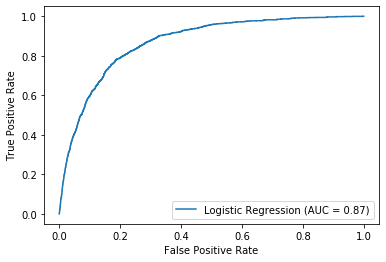

In [267]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display = metrics.RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=auc_lr,estimator_name='Logistic Regression')
display.plot() 
plt.show()   

## Parameter Tuning

In [269]:
# Changing Solver

In [270]:
# Running a loop to check different values of 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model_solver = LogisticRegression(random_state=1,penalty='l2', C = 0.30,solver=i, max_iter=12000)  # changing values of solver
    model_solver.fit(x_train_smote, y_train_smote) 
    y_predict_smote = model_solver.predict(x_test)     
    train_score.append(round(model_solver.score(x_train_smote, y_train_smote),3))
    test_score.append(round(model_solver.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.922, 0.921, 0.921, 0.724, 0.724]

[0.892, 0.892, 0.888, 0.743, 0.74]


## Analysis changing solver

* Default solver lbfgs
* Testing accuracy 0.89

* Other solvers are giving less accuracy compared to default, only exception being "newton-cg"
* The Training and Test accuracy is best with default settings, so not changing solver

In [617]:
# Changing class weight

In [622]:
model = LogisticRegression(random_state=1,penalty='l2',class_weight='None', max_iter=12000) # changing class weight to balanced

model.fit(x_train_smote, y_train_smote) 

y_predict_smote = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train_smote,y_train_smote))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Trainig accuracy 0.9228365024704297

Testing accuracy 0.892035807995061


## Analysis changing class weight

* Default class weight
* Testing accuracy 0.89

* Other class weights are giving less accuracy compared to default.
* The Training and Test accuracy is best with default settings, so not changing class weights

In [618]:
# Changing value of C

In [620]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', class_weight='balanced', C=i, max_iter=12000)  # changing values of C
    model.fit(x_train_smote, y_train_smote) 
    y_predict_smote = model.predict(x_test)     
    train_score.append(round(model.score(x_train_smote,y_train_smote),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.918, 0.923, 0.923, 0.924, 0.923, 0.923]

[0.882, 0.891, 0.892, 0.891, 0.892, 0.892]


## Analysis changing value of C

* Default value of C 1
* Testing accuracy 0.89

* Other value of C are not giving more accuracy than the default value
* The Training and Test accuracy is best with default settings, so not changing value of C

## Model 2 : Decision Tree Model

In [271]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [272]:
model_dt.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [273]:
# Measure Accuracy
model_dt.score(x_test,y_test)   # 75% accuracy

0.750733137829912

In [274]:
# Make class predictions for the testing set
y_predict_dt= model_dt.predict(x_test)

In [275]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_predict_dt,labels=[1,0])

array([[1083,  419],
       [2811, 8645]], dtype=int64)

In [276]:
print("Trainig accuracy",model_dt.score(x_train_smote,y_train_smote))  
print()
print("Testing accuracy",model_dt.score(x_test, y_test))
print()

Trainig accuracy 0.7640552477915855

Testing accuracy 0.750733137829912



In [277]:
# Text summary of the precision, recall, F1 score for each class
print(metrics.classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     11456
           1       0.28      0.72      0.40      1502

    accuracy                           0.75     12958
   macro avg       0.62      0.74      0.62     12958
weighted avg       0.88      0.75      0.79     12958



In [278]:
# Predict probabilities for the test data.
probs_dt = model_dt.predict_proba(x_test)

In [279]:
# Keep Probabilities of the positive class only.
probs_dt = probs_dt[:, 1]

In [280]:
auc_dt = metrics.roc_auc_score(y_test, probs_dt)
print('AUC: %.2f' % auc_dt)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .77 which means 77% predictions are correct

AUC: 0.77


In [281]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, probs_dt)

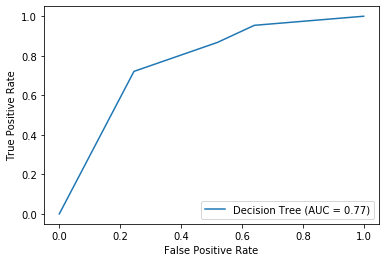

In [282]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display = metrics.RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, roc_auc=auc_dt,estimator_name='Decision Tree')
display.plot() 
plt.show() 

In [283]:
print (pd.DataFrame(model_dt.feature_importances_, columns = ["Imp"], index = x_train_smote.columns))

                        Imp
age                0.000000
education          0.000000
default            0.000000
balance            0.000000
housing            0.155339
loan               0.000000
month              0.000000
duration           0.604570
pdays              0.000000
previous           0.000000
poutcome           0.000000
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.000000
marital_married    0.000000
marital_single     0.000000
contact_cellular   0.000000
contact_telephone  0.000000
contact_unknown    0.240091


## Model 3 : Bagging Classifier

In [284]:
baggingClassifier = BaggingClassifier(n_estimators=50,random_state=1)

In [285]:
baggingClassifier.fit(x_train_smote,y_train_smote)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [286]:
baggingClassifier.score(x_train_smote,y_train_smote)
print(baggingClassifier.score(x_test,y_test))   # Accuracy 89%

0.8910325667541287


In [287]:
# Make class predictions for the testing set
y_predict_bag= baggingClassifier.predict(x_test)

In [288]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_predict_bag,labels=[1,0])

array([[  707,   795],
       [  617, 10839]], dtype=int64)

In [289]:
print("Trainig accuracy",baggingClassifier.score(x_train_smote,y_train_smote))  
print()
print("Testing accuracy",baggingClassifier.score(x_test, y_test))
print()


Trainig accuracy 0.999850276987573

Testing accuracy 0.8910325667541287



In [290]:
# Text summary of the precision, recall, F1 score for each class
print(metrics.classification_report(y_test,y_predict_bag))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11456
           1       0.53      0.47      0.50      1502

    accuracy                           0.89     12958
   macro avg       0.73      0.71      0.72     12958
weighted avg       0.89      0.89      0.89     12958



In [291]:
# Predict probabilities for the test data.
probs_bag = baggingClassifier.predict_proba(x_test)

In [292]:
# Keep Probabilities of the positive class only.
probs_bag = probs_bag[:, 1]

In [293]:
auc_bag = metrics.roc_auc_score(y_test, probs_bag)
print('AUC: %.2f' % auc_bag)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .90 which means 90% predictions are correct

AUC: 0.90


In [294]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

fpr_bag, tpr_bag, thresholds_bag = metrics.roc_curve(y_test, probs_bag)

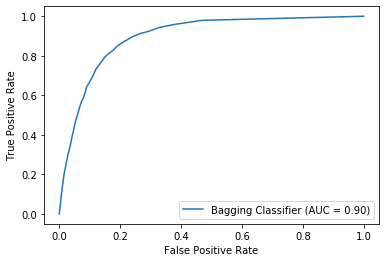

In [295]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display = metrics.RocCurveDisplay(fpr=fpr_bag, tpr=tpr_bag, roc_auc=auc_bag,estimator_name='Bagging Classifier')
display.plot() 
plt.show()  

## Model 4. Random Forest Classifier

In [296]:
randomforestclassifier=RandomForestClassifier(n_estimators=50, random_state=1,max_features=22)
randomforestclassifier.fit(x_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=22,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [297]:
randomforestclassifier.score(x_train_smote,y_train_smote)

0.9999251384937865

In [298]:
# Make class predictions for the testing set
y_predict_rf= randomforestclassifier.predict(x_test)

In [299]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_predict_rf,labels=[1,0])

array([[  699,   803],
       [  575, 10881]], dtype=int64)

In [300]:
print("Trainig accuracy",randomforestclassifier.score(x_train_smote,y_train_smote))  
print()
print("Testing accuracy",randomforestclassifier.score(x_test, y_test))
print()


Trainig accuracy 0.9999251384937865

Testing accuracy 0.8936564284611823



In [301]:
# Text summary of the precision, recall, F1 score for each class
print(metrics.classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11456
           1       0.55      0.47      0.50      1502

    accuracy                           0.89     12958
   macro avg       0.74      0.71      0.72     12958
weighted avg       0.89      0.89      0.89     12958



In [302]:
# Predict probabilities for the test data.
probs_rf = randomforestclassifier.predict_proba(x_test)

In [303]:
# Keep Probabilities of the positive class only.
probs_rf = probs_rf[:, 1]


In [304]:
auc_rf = metrics.roc_auc_score(y_test, probs_rf)
print('AUC: %.2f' % auc_rf)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .90 which means 90% predictions are correct

AUC: 0.90


In [305]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, probs_rf)

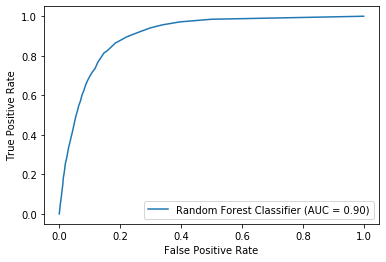

In [306]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display = metrics.RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=auc_rf,estimator_name='Random Forest Classifier')
display.plot() 
plt.show()   

In [307]:
print (pd.DataFrame(randomforestclassifier.feature_importances_, columns = ["Imp"], index = x_train_smote.columns))

                        Imp
age                0.043050
education          0.036655
default            0.000550
balance            0.058730
housing            0.108331
loan               0.020436
month              0.068492
duration           0.342110
pdays              0.035678
previous           0.007539
poutcome           0.044222
job_admin.         0.008424
job_blue-collar    0.013868
job_entrepreneur   0.003797
job_housemaid      0.003780
job_management     0.011643
job_retired        0.004745
job_self-employed  0.005571
job_services       0.007801
job_student        0.003062
job_technician     0.012576
job_unemployed     0.005366
job_unknown        0.000000
marital_divorced   0.018970
marital_married    0.020722
marital_single     0.018915
contact_cellular   0.011991
contact_telephone  0.010470
contact_unknown    0.072504


In [308]:
important_features_dict = {}
for x,i in enumerate(randomforestclassifier.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: %s' %important_features_list)

Most important features: [7, 4, 28, 6, 3, 10, 0, 1, 8, 24, 5, 23, 25, 12, 20, 26, 15, 27, 11, 18, 9, 17, 21, 16, 13, 14, 19, 2, 22]


## Model 5: AdaBoosting

In [309]:
adaclassifier=AdaBoostClassifier(n_estimators=60,random_state=1)

In [310]:
adaclassifier.fit(x_train_smote,y_train_smote)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=60, random_state=1)

In [311]:
# Measure Accuracy
adaclassifier.score(x_test,y_test)   # 89% accuracy

0.8900293255131965

In [312]:
# Make class predictions for the testing set
y_predict_ada= adaclassifier.predict(x_test)

In [313]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_predict_ada,labels=[1,0])

array([[  743,   759],
       [  666, 10790]], dtype=int64)

In [314]:
print("Trainig accuracy",adaclassifier.score(x_train_smote,y_train_smote))  
print()
print("Testing accuracy",adaclassifier.score(x_test, y_test))
print()


Trainig accuracy 0.9295740380296451

Testing accuracy 0.8900293255131965



In [315]:
# Text summary of the precision, recall, F1 score for each class
print(metrics.classification_report(y_test,y_predict_ada))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11456
           1       0.53      0.49      0.51      1502

    accuracy                           0.89     12958
   macro avg       0.73      0.72      0.72     12958
weighted avg       0.89      0.89      0.89     12958



In [316]:
# Predict probabilities for the test data.
probs_ada = adaclassifier.predict_proba(x_test)

In [317]:
# Keep Probabilities of the positive class only.
probs_ada = probs_ada[:, 1]

In [318]:
auc_ada = metrics.roc_auc_score(y_test, probs_ada)
print('AUC: %.2f' % auc_ada)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .88 which means 88% predictions are correct

AUC: 0.88


In [319]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

fpr_ada, tpr_ada, thresholds_ada = metrics.roc_curve(y_test, probs_ada)

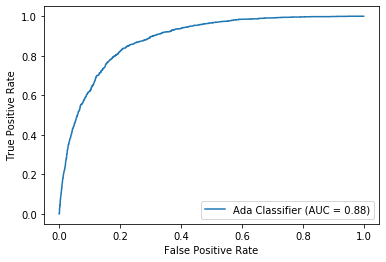

In [320]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display = metrics.RocCurveDisplay(fpr=fpr_ada, tpr=tpr_ada, roc_auc=auc_ada,estimator_name='Ada Classifier')
display.plot() 
plt.show()   

## Model 6 : Gradient Boosting

In [321]:
gradboostmodel=GradientBoostingClassifier(n_estimators=50,random_state=1)
gradboostmodel.fit(x_train_smote,y_train_smote)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [322]:
# Measure Accuracy
gradboostmodel.score(x_test,y_test)   # 87.69% accuracy

0.8769100169779287

In [323]:
# Make class predictions for the testing set
y_predict_grad= gradboostmodel.predict(x_test)

In [324]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_predict_grad,labels=[1,0])

array([[  908,   594],
       [ 1001, 10455]], dtype=int64)

In [325]:
print("Trainig accuracy",gradboostmodel.score(x_train_smote,y_train_smote))  
print()
print("Testing accuracy",gradboostmodel.score(x_test, y_test))
print()


Trainig accuracy 0.9161738284174278

Testing accuracy 0.8769100169779287



In [326]:
# Text summary of the precision, recall, F1 score for each class
print(metrics.classification_report(y_test,y_predict_grad))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     11456
           1       0.48      0.60      0.53      1502

    accuracy                           0.88     12958
   macro avg       0.71      0.76      0.73     12958
weighted avg       0.89      0.88      0.88     12958



In [327]:
# Predict probabilities for the test data.
probs_grad = gradboostmodel.predict_proba(x_test)

In [328]:
# Keep Probabilities of the positive class only.
probs_grad = probs_grad[:, 1]

In [329]:
auc_grad = metrics.roc_auc_score(y_test, probs_grad)
print('AUC: %.2f' % auc_grad)
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# Here we got a AUC of .89 which means 89% predictions are correct

AUC: 0.89


In [330]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

#True Positive Rate
#False Positive Rate

fpr_grad, tpr_grad, thresholds_grad = metrics.roc_curve(y_test, probs_grad)

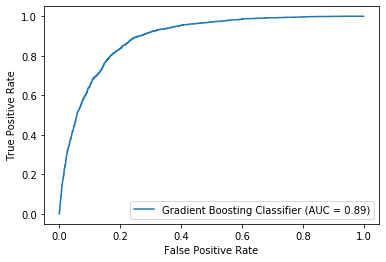

In [331]:
#Receiver Operating Characteristic
# The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, 
# the probability of predicting a real negative will be a positive.
display = metrics.RocCurveDisplay(fpr=fpr_grad, tpr=tpr_grad, roc_auc=auc_grad,estimator_name='Gradient Boosting Classifier')
display.plot() 
plt.show() 

## Model Comparison

In [332]:
df = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Bagging Classifier', 'Random Forest Classifier','Ada Boost Classifier', 'Gradient Boosting Classifier'], 
                    'Training Accuracy':[.92,.76,.99,.99,.93,.92], 
                    'Testing Accuracy':[.89,.75,.89,.89,.89,.88],
                    'Precision':[.56,.28,.53,.55,.53,.48],
                    'Recall':[.32,.72,.47, .47,.49,.60],
                    'F1 score':[.41,.40,.50,.50, .51,.53],
                    'Accuracy':[.89,.75,.89, .89,.89,.88],                 
                    'AUC':[.87,.77,.90,.90,.88,89],
                    'Type1 + Type 2 Errors':[1402,3230,1412,1378,1425,1595],
                   'Misclassification':['10.81%','24.92%','10.89%','10.63%','10.99%','12.30%']
                  }) 
  
# Let's visualize the dataframe 
df

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 score,Accuracy,AUC,Type1 + Type 2 Errors,Misclassification
0,Logistic Regression,0.92,0.89,0.56,0.32,0.41,0.89,0.87,1402,10.81%
1,Decision Tree,0.76,0.75,0.28,0.72,0.40,0.75,0.77,3230,24.92%
2,Bagging Classifier,0.99,0.89,0.53,0.47,0.50,0.89,0.90,1412,10.89%
3,Random Forest Classifier,0.99,0.89,0.55,0.47,0.50,0.89,0.90,1378,10.63%
4,Ada Boost Classifier,0.93,0.89,0.53,0.49,0.51,0.89,0.88,1425,10.99%
5,Gradient Boosting Classifier,0.92,0.88,0.48,0.60,0.53,0.88,89.00,1595,12.30%


## Conclusion

* The given data was treated with smote to treat class imbalance. The predictive models were compared and " Random Forest Classifier" is the best model due to its high precision and Recall and also due to its low Misclassification Rate.

* Best Model =  Random Forest Classifier
* Reasoning
* ============================================
* a. High Precision
* b. High Recall
* c. Low Missclassification Rate




* Top  5 Features
* =============================================

* duration	0.34211
* housing	0.108331
* contact_unknown	0.072504
* month	0.068492
* balance	0.05873
